In [17]:
%pip install pillow
%pip install requests
%pip install ipympl

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [18]:
from io import BytesIO

from requests import get as GetHTTPResponse
from IPython.display import display
from PIL import Image
from matplotlib import pyplot as Plot
from matplotlib import cm
from HardenedSteel.objects import CounterObject

%matplotlib ipympl

In [19]:
url_to_image: str = 'https://upload.wikimedia.org/wikipedia/commons/c/c1/White_dog_at_Strandby_Kirkevej_80%2C_2.jpg'
headers: dict = {
    'User-Agent': 'jupyter-script/0.1(https://github.com/KentVejrupMadsen/codespace.jupyter; kent.vejrup.madsen@designermadsen.dk)'
}

In [20]:
http_response = GetHTTPResponse(
    url_to_image, 
    headers=headers
)

In [21]:
figure = None

In [22]:
selected_image: Image.Image = Image.open(
    BytesIO(
        http_response.content
    )
)

width, height = selected_image.size
del http_response

In [23]:
class Spectrum:
    def __init__(self) -> None:
        self.red: list = list()
        self.green: list = list()
        self.blue: list = list()

        self.init()
    
    def __del__(self) -> None:
        del self.red, self.green, self.blue
    
    def init(self) -> None:
        for number in range(256):
            self.init_red()
            self.init_green()
            self.init_blue()
    
    def init_red(self) -> None:
        self.red.append(
            CounterObject(
                start_value=0
            )
        )

    def init_green(self) -> None:
        self.green.append(
            CounterObject(
                start_value=0
            )
        )

    def init_blue(self) -> None:
        self.blue.append(
            CounterObject(
                start_value=0
            )
        )

    # 0 - 255
    def calculate_stat(
        self,
        red_value: int, 
        green_value: int, 
        blue_value: int
    ) -> None:
        self.calculate_red(
            red_value
        )
        self.calculate_green(
            green_value
        )
        self.calculate_blue(
            blue_value
        )

    def calculate_red(
            self,
            red_value: int
    ) -> None: 
        selected: CounterObject = self.red[
            red_value
        ]
        selected.increment()

    def calculate_green(
            self,
            green_value: int
    ) -> None: 
        selected: CounterObject = self.green[
            green_value
        ]
        selected.increment()

    def calculate_blue(
            self,
            blue_value: int
    ) -> None: 
        selected: CounterObject = self.blue[
            blue_value
        ]
        selected.increment()
    

In [24]:
image_spectrum = Spectrum()
load_pixel = selected_image.load()

for x in range(width):
    for y in range(height):
        red, green, blue = load_pixel[x, y]
        image_spectrum.calculate_stat(
            red, 
            green, 
            blue
        )

del load_pixel

In [25]:
spectrum: list = list()

for i in range(256):
    value: int = i
    spectrum.append(value)

In [26]:
red_x = spectrum.copy()
red_y = list()

for y in range(len(image_spectrum.red)):
    value: int = int(image_spectrum.red[y])
    red_y.append(value)

In [27]:
green_x:list = red_x.copy()
green_y:list = list()

for y in range(len(image_spectrum.green)):
    value: int = int(image_spectrum.green[y])
    green_y.append(value)

In [28]:
blue_x: list = red_x.copy()
blue_y: list = list()

for y in range(len(image_spectrum.green)):
    value: int = int(image_spectrum.blue[y])
    blue_y.append(value)

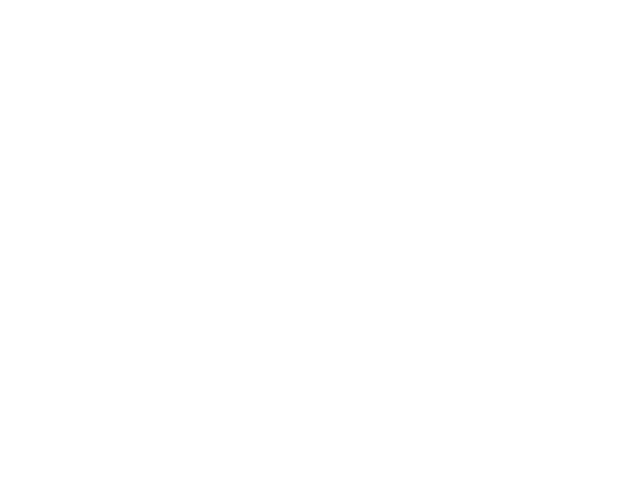

In [29]:
if figure is None:
    figure = Plot.figure()
else:
    figure.clear()

In [30]:
subplot = figure.add_subplot()
subplot.set_title(
    'color spectrum'
)

subplot.plot(
    red_x, 
    red_y, 
    label='red'
)

subplot.plot(
    green_x, 
    green_y, 
    label='green'
)

subplot.plot(
    blue_x, 
    blue_y, 
    label='blue'
)

print('done')

done


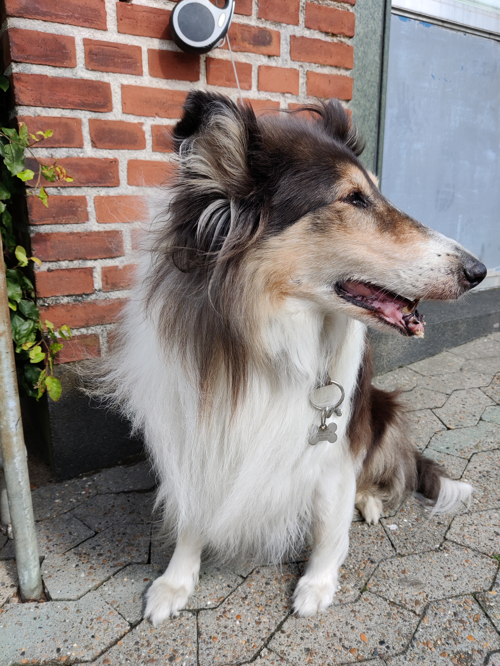

In [31]:
resize_to: tuple = (
    int(width/6), 
    int(height/6)
)

display(
    selected_image.copy().resize(
        resize_to
    )
)

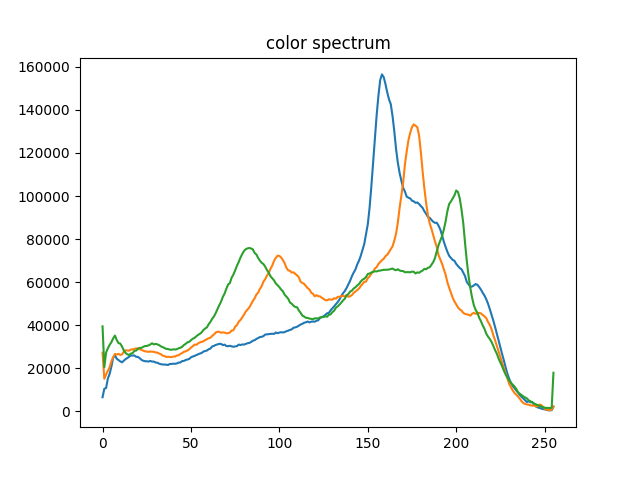

In [32]:
Plot.show()